
image 1/1 E:\Python\Data Science\Road Damage\pothole_detection_CNN\Dataset\Surface Erosion\1440.jpg: 640x640 1 Pothole, 1 Surface Erosion, 354.7ms
Speed: 48.5ms preprocess, 354.7ms inference, 29.2ms postprocess per image at shape (1, 3, 640, 640)
Detected labels: ['Surface Erosion', 'Pothole']
Score 7
Detected: 1 potholes, 0 cracks, 1 erosion
Road Condition: Moderate
Summary: Some cracks and moderate potholes observed.


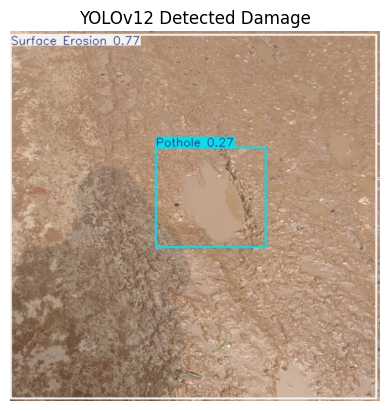

Subject: Road Condition Assessment Report - [Municipality Name]

Date: [Current Date]

To: Municipal Decision-Making Body

Introduction:

This report provides an overview of the detected road damage in [specific location(s)]. Our assessment aims to inform municipal decision-making regarding prioritization and potential repairs.

Key Findings:

1. Potholes: One pothole has been identified, which is a common and concerning issue that can cause vehicles to vibrate and lead to tire damage.
2. Cracks: No surface cracks have been observed at this location.
3. Surface Erosion: Moderate surface erosion (1 out of 5) was detected, indicating that the road's surface has been affected by wear and tear.

Overall Assessment:

The overall road condition is rated as "Moderate." While there are some notable issues, such as potholes and surface erosion, it is essential to note that these problems do not currently pose a significant safety risk. However, ongoing maintenance and repairs will be necessary 

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import numpy as np

# model = YOLO("E:\Python\Data Science\Road Damage\pothole_detection_CNN\\runs\detect\\road_damage_detection4\weights\\best.pt") 
MODEL_PATH = config("MODEL_PATH2") 
model = tf.keras.models.load_model(MODEL_PATH)
image_path = "E:\Python\Data Science\Road Damage\pothole_detection_CNN\Dataset\Surface Erosion\\1440.jpg" 
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

results = model(image_path)

damage_counts = {"Crack": 0, "Pothole": 0, "Surface Erosion": 0}
for cls_id in results[0].boxes.cls:
    label = model.names[int(cls_id)]
    if label in damage_counts:
        damage_counts[label] += 1

score = (
    damage_counts["Pothole"] * 3 +
    damage_counts["Crack"] * 2 +
    damage_counts["Surface Erosion"] * 4
)
print("Detected labels:", [model.names[int(cls)] for cls in results[0].boxes.cls])
print("Score", score)
if score >= 15:
    condition = "Poor"
    explanation = "Extensive damage including potholes and erosion is present."
elif score >= 7:
    condition = "Moderate"
    explanation = "Some cracks and moderate potholes observed."
else:
    condition = "Good"
    explanation = "Minimal visible damage detected."

summary_text = (
    f"Detected: {damage_counts.get('Pothole', 0)} potholes, "
    f"{damage_counts.get('Crack', 0)} cracks, {damage_counts.get('Surface Erosion', 0)} erosion\n"
    f"Road Condition: {condition}\n"
    f"Summary: {explanation}"
)

print(summary_text)

from PIL import Image
results[0].save(filename="detected.jpg")
detected_img = Image.open("detected.jpg")
plt.imshow(detected_img)
plt.title("YOLOv12 Detected Damage")
plt.axis('off')
plt.show()
import ollama
prompt = f"""
Detected road damage:
- Potholes: {damage_counts['Pothole']}
- Cracks: {damage_counts['Crack']}
- Surface Erosion: {damage_counts['Surface Erosion']}
Overall road condition is rated as: {condition}.

Write a short, professional report summarizing the road damage condition for municipal assessment. Use clear, non-technical language.
"""
response = ollama.chat(
    model='llama3.2', 
    messages=[
        {'role': 'user', 'content': prompt}
    ]
)
print(response['message']['content'])

